In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pickle

def load_data_from_pickle(pickle_file_path):
    """
    Load the data from the pickle file.

    Parameters:
    pickle_file_path (str): Path to the pickle file containing the paper data.

    Returns:
    dict: The dictionary mapping paper IDs to their citations and keywords.
    """
    with open(pickle_file_path, 'rb') as f:
        data = pickle.load(f)
    
    return data

# Example usage
pickle_file_path = 'D:\\Projects\\3Credit_project\\Aminer Dataset\\paper_data.pkl'  # Path to the pickle file you saved
paper_data = load_data_from_pickle(pickle_file_path)


In [3]:
import networkx as nx

def build_citation_graph(paper_data):
    """
    Build a citation graph using the paper data.

    Parameters:
    paper_data (dict): Dictionary containing paper IDs, citations, and keywords.

    Returns:
    G (nx.DiGraph): A directed graph where nodes are papers and edges represent citations.
    """
    G = nx.DiGraph()  # Directed graph since citations are directional

    for paper_id, details in paper_data.items():
        # Add the paper itself as a node
        G.add_node(paper_id, keywords=details['keywords'])
        
        # Add citation edges (directed)
        for citation_id in details['citations']:
            if citation_id in paper_data:  # Only add citations that exist in the dataset
                G.add_edge(paper_id, citation_id)  # Edge from paper_id -> citation_id

    return G

# Example usage
G = build_citation_graph(paper_data)

# Check the number of nodes and edges in the graph
print(f"Graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")


Graph has 5259858 nodes and 32720016 edges.


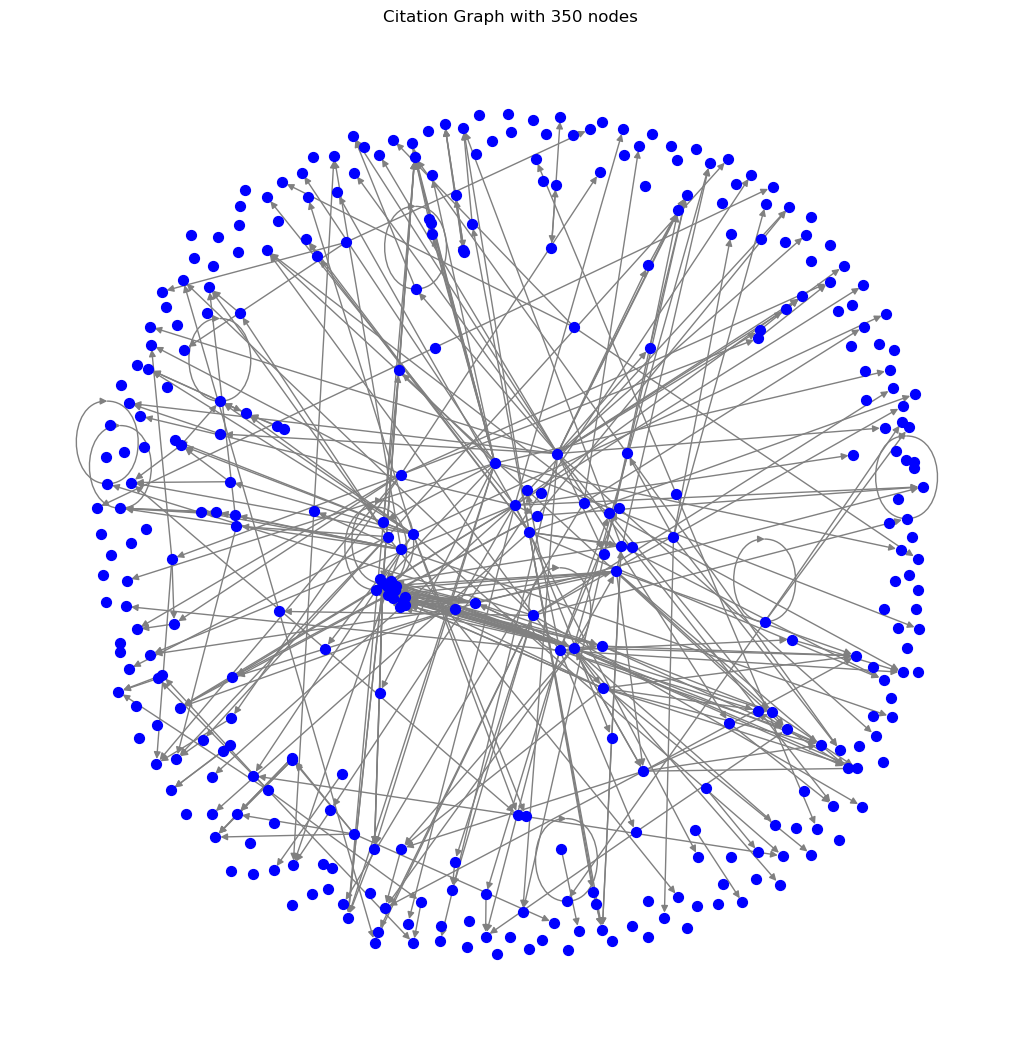

In [4]:
import matplotlib.pyplot as plt

def visualize_graph(G, num_nodes=350):
    """
    Visualize a small portion of the citation graph.
    
    Parameters:
    G (nx.Graph): The citation graph.
    num_nodes (int): The number of nodes to visualize (default is 100).
    """
    # Take a subgraph to visualize, as the full graph might be too large
    subgraph = G.subgraph(list(G.nodes())[:num_nodes])
    
    pos = nx.spring_layout(subgraph)  # Layout for visualization
    plt.figure(figsize=(10, 10))
    
    # Draw nodes and edges
    nx.draw(subgraph, pos, with_labels=False, node_size=50, edge_color='grey', node_color='blue')
    
    plt.title(f'Citation Graph with {num_nodes} nodes')
    plt.show()

# Visualize the first 100 nodes and their edges
visualize_graph(G)
